In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_test.csv')

Train data set has 12 columns, 500 entries

1.  Unnamed: 0
2.  Age
3.  Gender
4.  Total_Bilirubin
5.  Direct_Bilirubin
6.  Alkaline_Phosphotase
7.  Alamine_Aminotransferase
8.  Aspartate_Aminotransferase
9.  Total_Proteins
10. Albumin
11. Albumin_and_Globulin_Ratio- has 4 null values
12. Dataset


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  82 non-null     int64  
 1   Age                         82 non-null     int64  
 2   Gender                      82 non-null     object 
 3   Total_Bilirubin             82 non-null     float64
 4   Direct_Bilirubin            82 non-null     float64
 5   Alkaline_Phosphotase        82 non-null     int64  
 6   Alamine_Aminotransferase    82 non-null     int64  
 7   Aspartate_Aminotransferase  82 non-null     int64  
 8   Total_Protiens              82 non-null     float64
 9   Albumin                     82 non-null     float64
 10  Albumin_and_Globulin_Ratio  82 non-null     float64
dtypes: float64(5), int64(5), object(1)
memory usage: 7.2+ KB


Test data has 11 columns, 82 entries.
All columns except the dataset column.

In [10]:
train.head()

,Unnamed: 0,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [12]:
train.Gender[train.Gender == 'Male'] = 0
train.Gender[train.Gender == 'Female'] = 1
test.Gender[test.Gender == 'Male'] = 0
test.Gender[test.Gender == 'Female'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [20]:
train['Albumin_and_Globulin_Ratio'] = train['Albumin_and_Globulin_Ratio'].fillna(train['Albumin_and_Globulin_Ratio'].mean())
train.isnull().sum()

Unnamed: 0                    0
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [16]:
# first import data visualizations libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


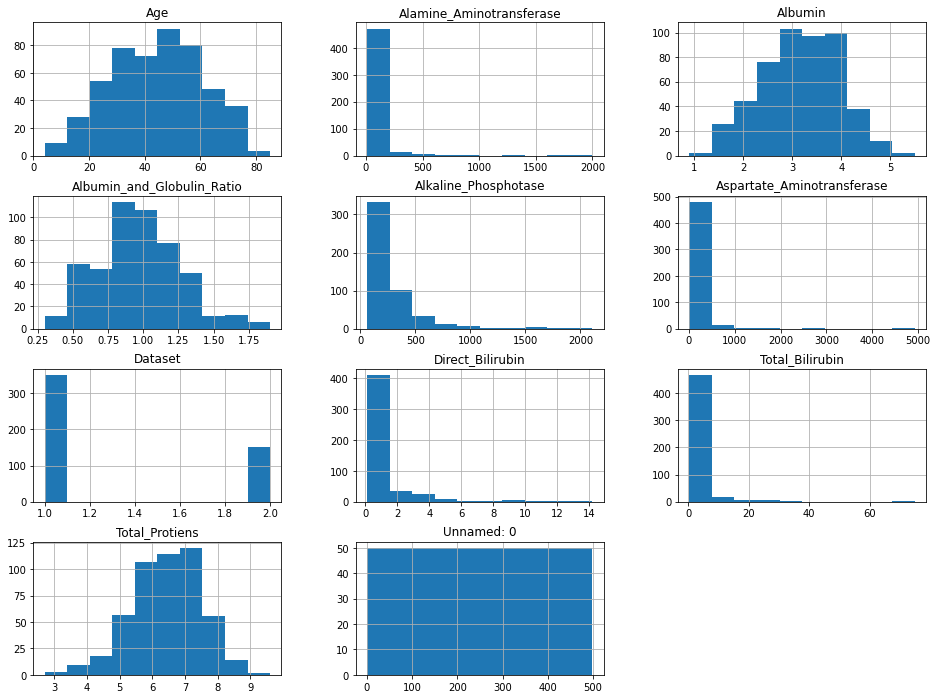

In [21]:
train.hist(bins=10, figsize=(16,12))
plt.show()

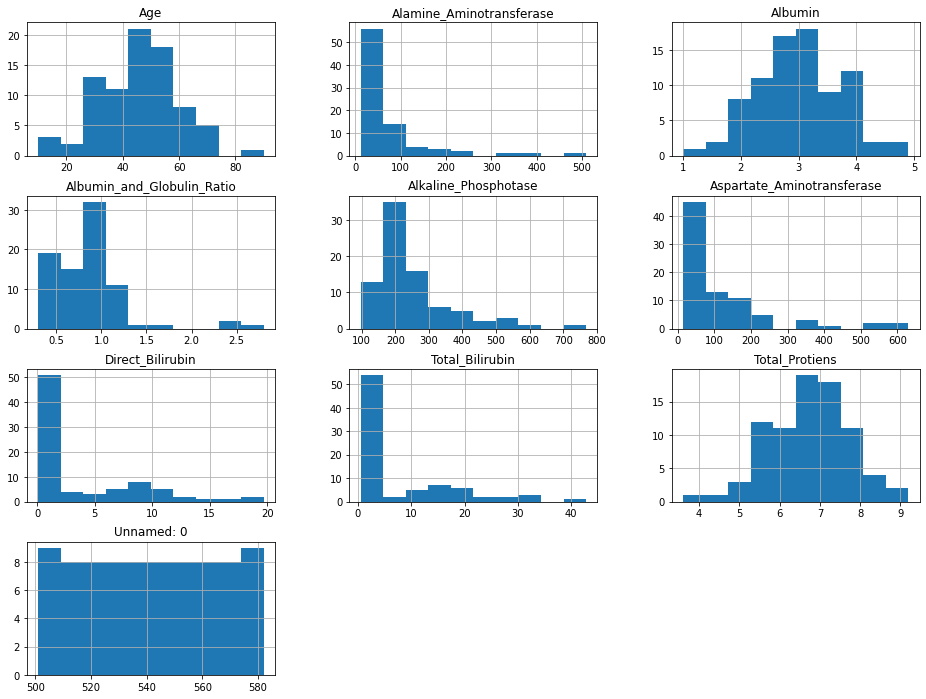

In [23]:
test.hist(bins=10, figsize=(16,12))
plt.show()

In [29]:
X_train = train.iloc[:, 1:-1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:, 1:].values

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
predictions = classifier.predict(X_test)
y_pred_train_lr = classifier.predict(X_train) 

In [34]:
from sklearn.metrics import f1_score

In [35]:
print("F1 Score:",f1_score(y_pred_train_lr,y_train))

F1 Score: 0.814070351758794


In [36]:
res = pd.DataFrame(predictions)
res.index = test.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("prediction_results_LP.csv")      